In [9]:
%matplotlib notebook
import numpy as np
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

Dataset and visualization
----

The goal for this notebook is to show you some data, define terms of supervised learning, and give you confidence to go out and grab data from the wild world. Also, the first rule of machine learning:  **LOOK AT YOUR DATA**. 

I cannot emphasize this maxim enough: **LOOK AT YOUR DATA**


1. Housing prices are one of the most popular datasets on Kaggle--and its classical. We're going to use the [Ames set](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt). This is an updated dataset for the famous "Boston Housing Dataset", which has been used for many years in stats classes.

2. I also want to point out the [UCI machine learning datasets](https://archive.ics.uci.edu/ml/index.php), which are amazing for ML datasets. Could be valuable for your projects!



In [2]:
import pandas as pd

url="https://www.openintro.org/stat/data/ames.csv"
df=pd.read_csv(url)
data=df.values
df[1:10]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


<IPython.core.display.Javascript object>


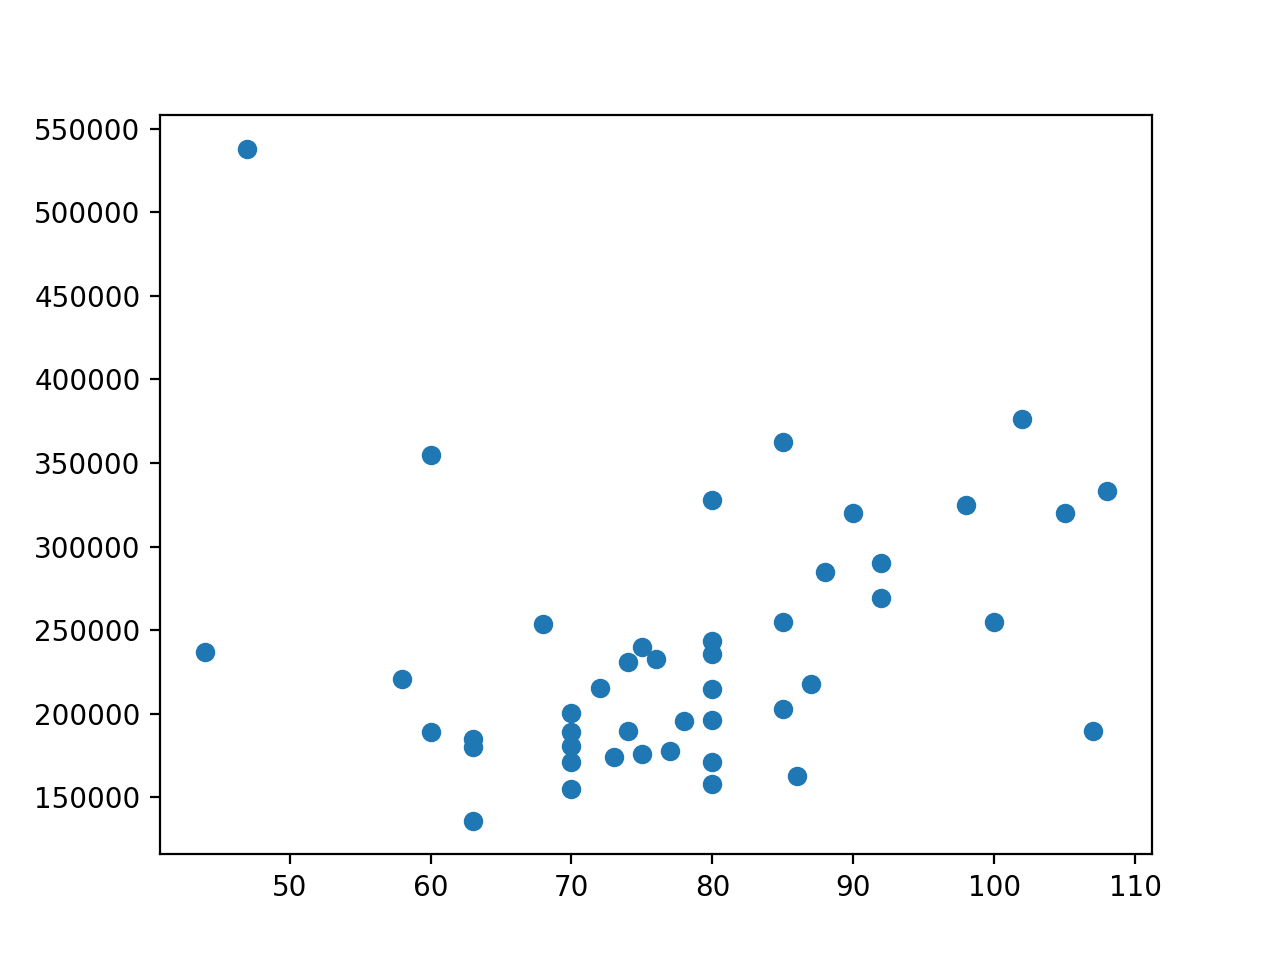

In [20]:
n = 50
#
# This says "let's look at two story houses sold in 2010"
#
new_house = (df["MS.SubClass"] == 60) & (df["Yr.Sold"] == 2010)
price = df['SalePrice'][new_house]
lot   = df['Lot.Frontage'][new_house]
bedroom = df['Bedroom.AbvGr'][new_house]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(lot, price)
ax.scatter(bedroom, price)
plt.show()

<IPython.core.display.Javascript object>


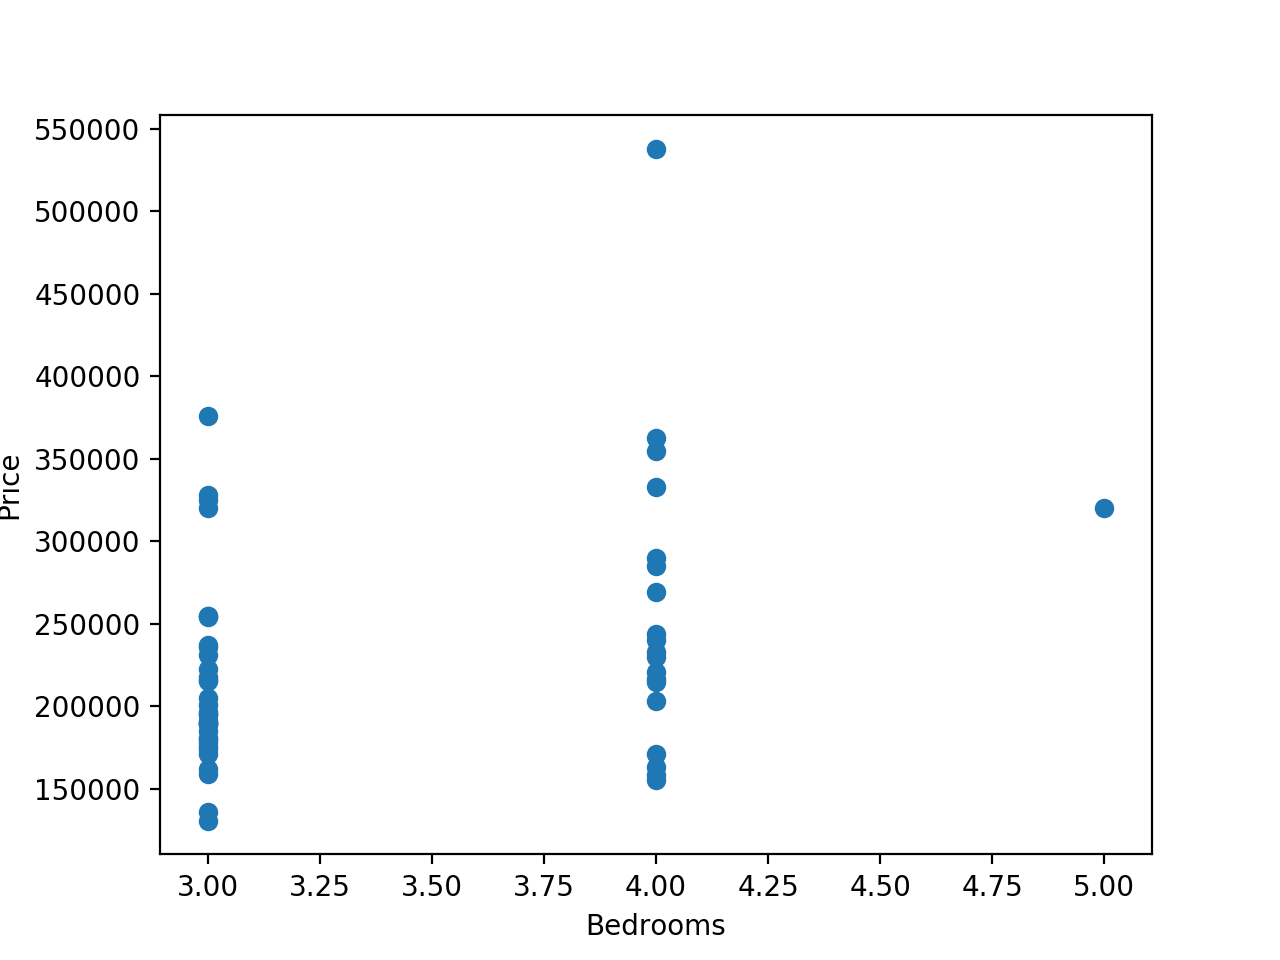

In [21]:
fig = plt.figure()
plt.scatter(bedroom, price)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

<IPython.core.display.Javascript object>


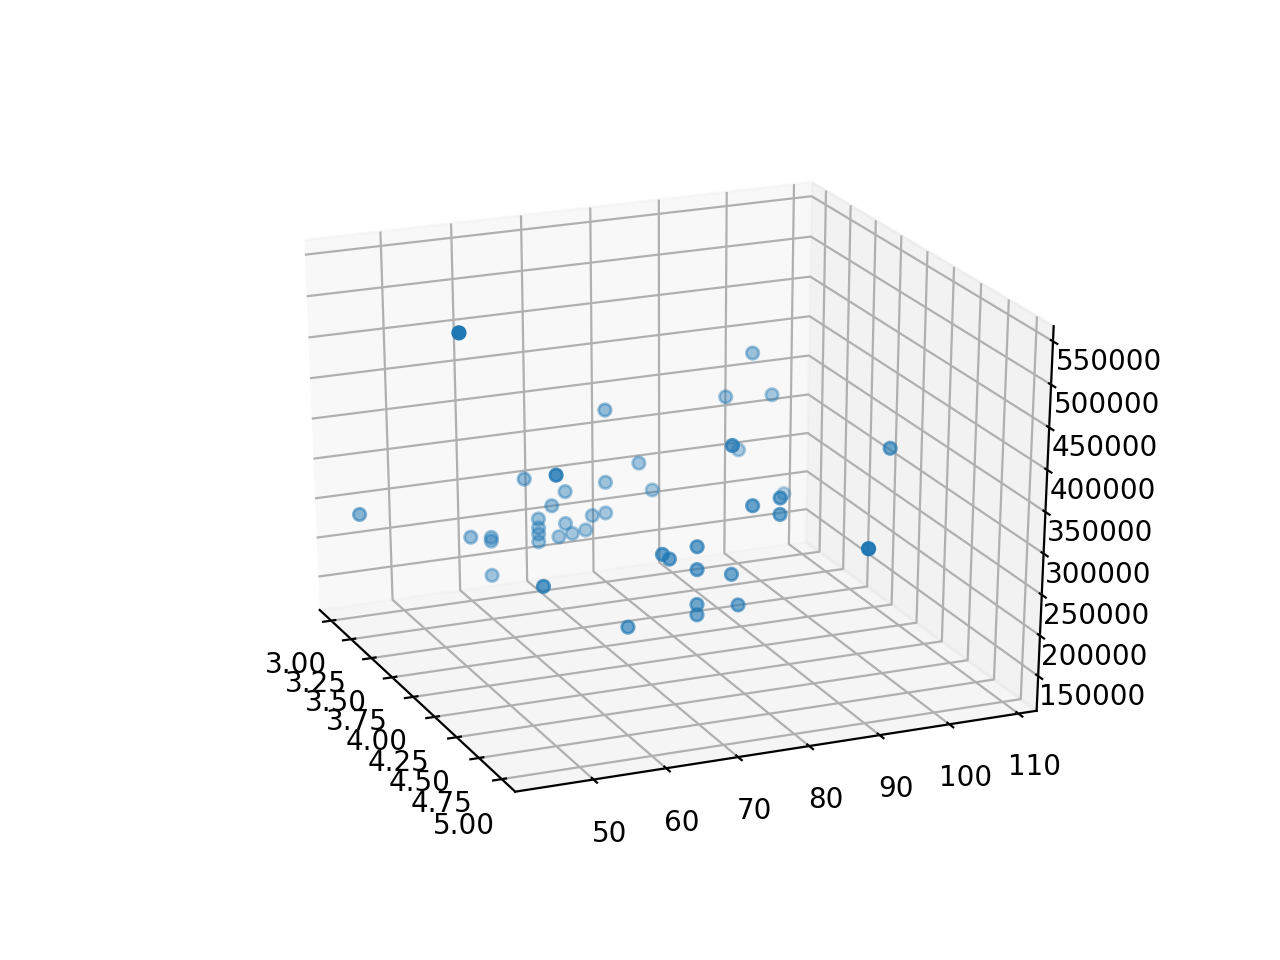

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(bedroom, lot, price)
plt.show()

In [33]:
price[1:7], bedroom[1:7], lot[1:7]

(5     195500
 9     189000
 10    175900
 12    180400
 15    538000
 22    216000
 Name: SalePrice, dtype: int64, 5     3
 9     3
 10    3
 12    3
 15    4
 22    3
 Name: Bedroom.AbvGr, dtype: int64, 5     78.0
 9     60.0
 10    75.0
 12    63.0
 15    47.0
 22     NaN
 Name: Lot.Frontage, dtype: float64)

There does intuitvely seem to be a correlation, but we could do a bit better if we added in another feature.  

A much simpler, but still real linear relationship!
---

Here is another dataset, in which we do. Let's look at miles per gallon in the city to Highway Miles per Gallon of old cars. The hypothesis is that there should be a linear relationship, because some cars are just more efficient than others. 

In [6]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
_df=pd.read_csv(url, header=None)
_df[1:10]
d = _df.values

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


<IPython.core.display.Javascript object>


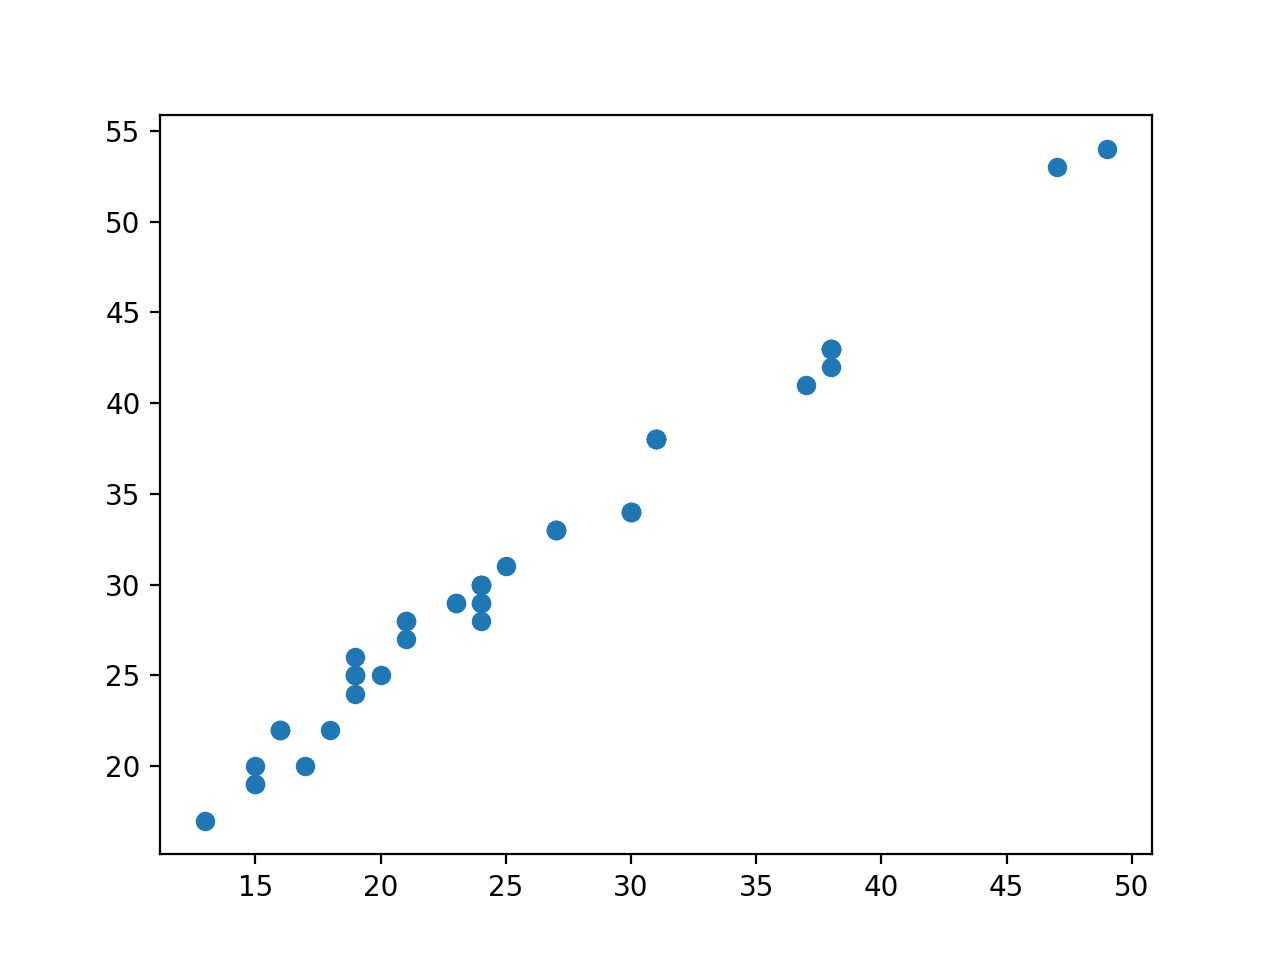

In [32]:
city_mpg, hi_mpg = 23,24
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(d[1:n,city_mpg], d[1:n,hi_mpg])
plt.show()

Now that looks like a line! Let's recall how to fit it!